<a href="https://colab.research.google.com/github/bwoody13/CNN-MNIST_CIFAR10-Classification/blob/main/train_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize Notebook
Make sure to select GPU runtime if you want to train on GPU

## Clone and Pull Git Repository (Only if using in Colab - recommended for training and to use GPU)

In [1]:
!git clone https://github.com/bwoody13/CNN-MNIST_CIFAR10-Classification.git
%cd CNN-MNIST_CIFAR10-Classification

Cloning into 'CNN-MNIST_CIFAR10-Classification'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 63 (delta 25), reused 50 (delta 17), pack-reused 0
Receiving objects: 100% (63/63), 17.55 MiB | 16.36 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/CNN-MNIST_CIFAR10-Classification


Pull anytime repo udpated and want to have new code here

In [11]:
!git pull origin main

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (4/4), 446 bytes | 446.00 KiB/s, done.
From https://github.com/bwoody13/CNN-MNIST_CIFAR10-Classification
 * branch            main       -> FETCH_HEAD
   c393e8e..7abb80d  main       -> origin/main
Updating c393e8e..7abb80d
Fast-forward
 MNIST/mnist_cnn.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [3]:
!pwd

/content/CNN-MNIST_CIFAR10-Classification


## Import Necessary Libraries

In [9]:
%load_ext autoreload
%autoreload 2

In [12]:
# External
import torch
from torchvision.datasets import MNIST, CIFAR10
from torchvision import transforms
from torchvision.transforms import ToTensor, Normalize
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import numpy as np
import matplotlib.pyplot as plt

# Internal
from MNIST.mnist_cnn import MNISTCNN
from CIFAR10.cifar10_cnn import CIFAR10CNN
# from base_cnn import BaseCNN
from train_test import train, test
from save_load import save_model, MNIST_type, CIFAR10_type

# MNIST Training

## Load and Prep Datasets for Training

In [4]:
data_mean = 0.1307
data_std = 0.3081
init_trans = transforms.Compose([
    ToTensor(),
    Normalize((data_mean,), (data_std,))
])
dataset = MNIST(root='data/', train=True, download=True, transform=init_trans)
test_ds = MNIST(root='data/', train=False, download=True, transform=init_trans)
val_size = int(0.1 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

100%|██████████| 9912422/9912422 [00:00<00:00, 143418427.08it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 130674966.37it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 165341192.42it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7301850.81it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw


## Visualize Data

torch.Size([16, 1, 28, 28])


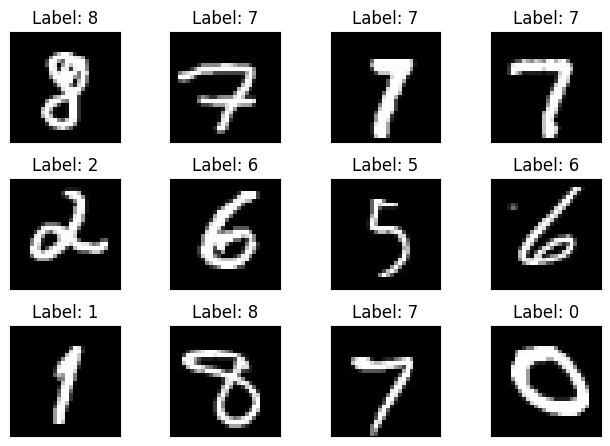

In [24]:
examples = enumerate(DataLoader(dataset, 16, shuffle=True))
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)
fig = plt.figure()
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Label: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

plt.show()

## Initialize CNN Model

In [14]:
print(torch.cuda.is_available())
model = MNISTCNN(momentum=0.9, learning_rate=0.01, weight_decay=1e-5, epochs=1)
print(model.device)

True
cuda:0


## Create DataLoaders according to model

In [15]:
num_workers = 2 if 'cuda' in model.device.type else 0
pin_memory = True if 'cuda' in model.device.type else False

train_loader = DataLoader(train_dataset, model.batch_size, shuffle=True, num_workers=num_workers, pin_memory=pin_memory)
val_loader = DataLoader(val_dataset, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)
test_loader = DataLoader(test_ds, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)

## Train the Model

Epoch 1, Batch 100, Loss: 1.1257
Epoch 1, Batch 200, Loss: 0.3448
Epoch 1, Batch 300, Loss: 0.2235
Epoch 1, Batch 400, Loss: 0.2131
Epoch 1, Batch 500, Loss: 0.1752
Epoch 1, Batch 600, Loss: 0.1577
Epoch 1, Batch 700, Loss: 0.1462
Epoch 1, Batch 800, Loss: 0.1434
Validation Loss: 0.0617, Validation Accuracy: 98.15%


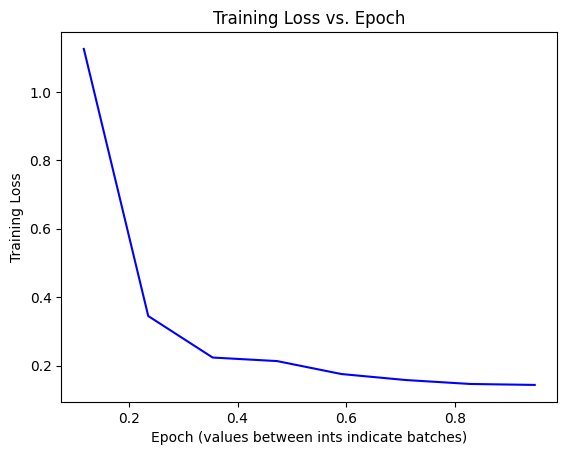

In [16]:
train(model, train_loader, val_loader)

## Test Model

In [17]:
# Train Dataset
test(model, train_loader)

Accuracy for class: 0     is 5247/5294 (99.11%)
Accuracy for class: 1     is 6011/6080 (98.87%)
Accuracy for class: 2     is 5283/5363 (98.51%)
Accuracy for class: 3     is 5402/5536 (97.58%)
Accuracy for class: 4     is 5219/5277 (98.90%)
Accuracy for class: 5     is 4812/4895 (98.30%)
Accuracy for class: 6     is 5241/5312 (98.66%)
Accuracy for class: 7     is 5564/5639 (98.67%)
Accuracy for class: 8     is 5101/5256 (97.05%)
Accuracy for class: 9     is 5124/5348 (95.81%)

Test set: Average loss: 0.0599, Accuracy: 53004/54000 (98.16%)


In [18]:
# Test Dataset
test(model, test_loader)

Accuracy for class: 0     is 974/980 (99.39%)
Accuracy for class: 1     is 1130/1135 (99.56%)
Accuracy for class: 2     is 1018/1032 (98.64%)
Accuracy for class: 3     is 986/1010 (97.62%)
Accuracy for class: 4     is 976/982 (99.39%)
Accuracy for class: 5     is 882/892 (98.88%)
Accuracy for class: 6     is 939/958 (98.02%)
Accuracy for class: 7     is 1013/1028 (98.54%)
Accuracy for class: 8     is 948/974 (97.33%)
Accuracy for class: 9     is 963/1009 (95.44%)

Test set: Average loss: 0.0519, Accuracy: 9829/10000 (98.29%)


## Save Model (Need to move to repo manually)

In [19]:
save_model(model, "first_trained_model", MNIST_type)

# CIFAR10 Training

## Load and Prep Datasets for Training

In [20]:
init_trans = transforms.Compose([
    ToTensor(),
    Normalize((0.5,0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = CIFAR10(root='data/', train=True, download=True, transform=init_trans)
test_ds = CIFAR10(root='data/', train=False, download=True, transform=init_trans)
val_size = int(0.1 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

100%|██████████| 170498071/170498071 [00:12<00:00, 13198077.07it/s]


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


## Visualize Data

torch.Size([16, 3, 32, 32])


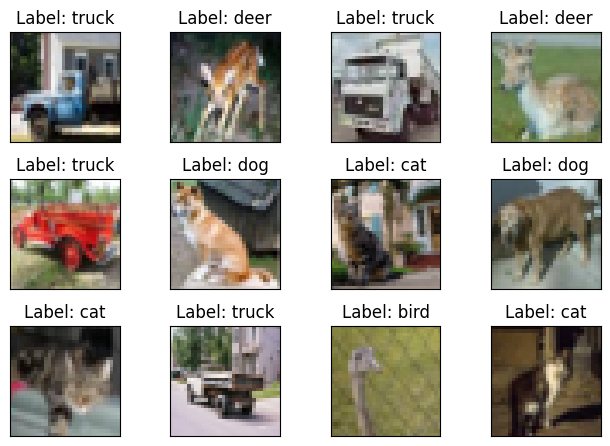

In [21]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
examples = enumerate(DataLoader(dataset, 16, shuffle=True))
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)
fig = plt.figure()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.tight_layout()
    # Unnoramlize image and transpose (inputs are channel, height, width)
    image = example_data[i] * 0.5 + 0.5
    image = np.transpose(image, (1, 2, 0))
    plt.imshow(image)
    plt.title(f"Label: {classes[example_targets[i]]}")
    plt.xticks([])
    plt.yticks([])

plt.show()

## Initialize CNN Model

In [22]:
print(torch.cuda.is_available())
model = CIFAR10CNN(momentum=0.9, learning_rate=0.1, epochs=1, weight_decay=1e-4, batch_size=128)
print(model.device)

True
cuda:0


## Create DataLoaders according to model

In [23]:
num_workers = 2 if 'cuda' in model.device.type else 0
pin_memory = True if 'cuda' in model.device.type else False

train_loader = DataLoader(train_dataset, model.batch_size, shuffle=True, num_workers=num_workers, pin_memory=pin_memory)
val_loader = DataLoader(val_dataset, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)
test_loader = DataLoader(test_ds, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)

## Train the Model

Epoch 1, Batch 100, Loss: 1.9375
Epoch 1, Batch 200, Loss: 1.7008
Epoch 1, Batch 300, Loss: 1.6142
Validation Loss: -2.8767, Validation Accuracy: 42.86%


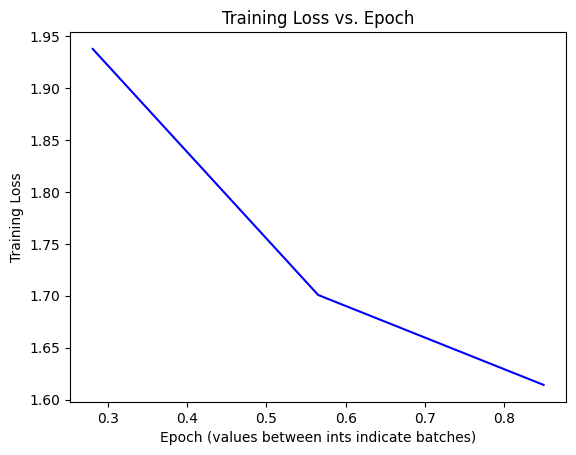

In [24]:
train(model, train_loader, val_loader)

## Test Model

In [25]:
# Train Dataset
test(model, train_loader)

Accuracy for class: plane is 1830/4492 (40.74%)
Accuracy for class: car   is 1950/4482 (43.51%)
Accuracy for class: bird  is 498/4478 (11.12%)
Accuracy for class: cat   is 896/4488 (19.96%)
Accuracy for class: deer  is 1051/4509 (23.31%)
Accuracy for class: dog   is 2444/4517 (54.11%)
Accuracy for class: frog  is 3909/4521 (86.46%)
Accuracy for class: horse is 1499/4511 (33.23%)
Accuracy for class: ship  is 3730/4503 (82.83%)
Accuracy for class: truck is 1834/4499 (40.76%)

Test set: Average loss: -2.8918, Accuracy: 19641/45000 (43.65%)


In [26]:
# Test Dataset
test(model, test_loader)

Accuracy for class: plane is 409/1000 (40.90%)
Accuracy for class: car   is 397/1000 (39.70%)
Accuracy for class: bird  is 104/1000 (10.40%)
Accuracy for class: cat   is 205/1000 (20.50%)
Accuracy for class: deer  is 227/1000 (22.70%)
Accuracy for class: dog   is 552/1000 (55.20%)
Accuracy for class: frog  is 868/1000 (86.80%)
Accuracy for class: horse is 349/1000 (34.90%)
Accuracy for class: ship  is 824/1000 (82.40%)
Accuracy for class: truck is 402/1000 (40.20%)

Test set: Average loss: -2.8919, Accuracy: 4337/10000 (43.37%)


## Save Model (Need to move to repo manually)

In [27]:
save_model(model, "first_trained_model", CIFAR10_type)